### US Election Social Text Analysis

The analysis was performed a month in advance of the US 2020 elections

#### Outline/Workflow

##### 1. Data Collection Steps
- Twitter Data Collection (Using AWS Kinesis/EC2/Linux)
- Twitter Data Storage (Using AWS S3)
- Data Export from AWS to Python (Using AWS Athena) (File Name: uselection.csv)

##### 2. Data Cleaning and Inspection
##### 3. Exploratory Data Analysis
##### 4. Sentiment Analysis
- Computing polarity and subjectivity on tweets
- Tweets classification based on polarity and subjectivity
- EDA on created features of polarity and subjectivity

##### 5. Comparative Analysis between Trump and Biden
##### 6. Findings
##### 7. Challenges/Next Steps

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import re

In [13]:
#importing raw tweets obtained from webscraping
election = pd.read_csv('uselection.csv')

In [3]:
election.head()

,id,username,tweet,followers_count,location
0,1314003645998956550,Andrew McQuinn,@SenSchumer @MarnieFriedma11 Trump supports ar...,84.0,None
1,1314003646280077315,- kay -,RT @GlennKesslerWP: Trump’s antibody treatment...,15463.0,Texas
2,1314003646280065024,🇦🇷🇦🇷Alberto Carlos,RT @RealJamesWoods: Trump would cut taxes by a...,8950.0,CABA
3,1314003646330404870,sallie sanders,RT @sherdngr: Take it from a cattleman: That d...,318.0,"baton rouge, la"
4,1314003646393192449,Gal from🏖Cal⭐️⭐️⭐️,RT @paulsperry_: BREAKING: Joe Biden is the su...,1855.0,California


In [58]:
dt.now()

datetime.datetime(2020, 10, 12, 10, 6, 24, 102611)

In [14]:
election.shape

(1024971, 5)

In [15]:
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024971 entries, 0 to 1024970
Data columns (total 5 columns):
id                 1024854 non-null object
username           1024899 non-null object
tweet              1024795 non-null object
followers_count    1024795 non-null float64
location           1024748 non-null object
dtypes: float64(1), object(4)
memory usage: 39.1+ MB


### 2. Data Cleaning & Inspection

In [13]:
#Removing http: from the tweet
election['tweet'] = election['tweet'].str.replace(r"http\S+","")
election['tweet'].head()

0     senschumer  marniefriedma   trump supports ar...
1    rt  glennkesslerwp  trump s antibody treatment...
2    rt  realjameswoods  trump would cut taxes by a...
3    rt  sherdngr  take it from a cattleman  that d...
4    rt  paulsperry_  breaking  joe biden is the su...
Name: tweet, dtype: object

In [6]:
#Removing regular expression RT
#election['tweet'] = election['tweet'].str.replace(r"RT @\S+","")
#election['tweet'].head()

0    @SenSchumer @MarnieFriedma11 Trump supports ar...
1     Trump’s antibody treatment was tested using c...
2     Trump would cut taxes by about $1.7T, Biden w...
3     Take it from a cattleman: That drug Trump too...
4     BREAKING: Joe Biden is the subject of an acti...
Name: tweet, dtype: object

In [17]:
election['tweet'] = election['tweet'].str.replace(r"[^a-zA-z]", " ")
election['tweet'].head()

0     SenSchumer  MarnieFriedma   Trump supports ar...
1    RT  GlennKesslerWP  Trump s antibody treatment...
2    RT  RealJamesWoods  Trump would cut taxes by a...
3    RT  sherdngr  Take it from a cattleman  That d...
4    RT  paulsperry_  BREAKING  Joe Biden is the su...
Name: tweet, dtype: object

In [18]:
election['tweet'] = election['tweet'].str.lower()
election['tweet'].head()

0     senschumer  marniefriedma   trump supports ar...
1    rt  glennkesslerwp  trump s antibody treatment...
2    rt  realjameswoods  trump would cut taxes by a...
3    rt  sherdngr  take it from a cattleman  that d...
4    rt  paulsperry_  breaking  joe biden is the su...
Name: tweet, dtype: object

In [19]:
election.head(5)

,id,username,tweet,followers_count,location
0,1314003645998956550,Andrew McQuinn,senschumer marniefriedma trump supports ar...,84.0,None
1,1314003646280077315,- kay -,rt glennkesslerwp trump s antibody treatment...,15463.0,Texas
2,1314003646280065024,🇦🇷🇦🇷Alberto Carlos,rt realjameswoods trump would cut taxes by a...,8950.0,CABA
3,1314003646330404870,sallie sanders,rt sherdngr take it from a cattleman that d...,318.0,"baton rouge, la"
4,1314003646393192449,Gal from🏖Cal⭐️⭐️⭐️,rt paulsperry_ breaking joe biden is the su...,1855.0,California


In [20]:
#Removing symbols/images from username column
election['username'] = election['username'].str.replace(r"[^a-zA-z]", " ")


In [21]:
#Finding duplicate tweets
sum(election['tweet'].duplicated())

753948

In [29]:
election[election['tweet'].duplicated()]

,id,username,tweet,followers_count,location
21,1314003649711026176,Steven Lemongello,rt stevenmazie breaking trump administratio...,7387.0,"Orlando, FL"
29,1314003650105270273,Cathy carlisle,rt anacabrera in an unprecedented move the ...,184.0,None
45,1314003650625310720,litzy,rt realheatherd i know all of you pro life ...,782.0,None
52,1314003650918838273,Jesse Chilton,rt sarahcpr trump s antibody treatment was t...,74.0,"British Columbia, Canada"
70,1314003653628432386,Gwenie,rt glennkesslerwp trump s antibody treatment...,4206.0,864511320
...,...,...,...,...,...
1024964,1313987234417176579,ThingsFallApart,rt clairecmc wait wait trump is telling ...,39.0,None
1024965,1313987234408865795,Big Bandz,rt perpetualwinger drdenagrayson these resu...,462.0,None
1024966,1313987234589224965,Dorothy Miller,rt paulsperry_ breaking joe biden is the su...,32.0,None
1024967,1313987234497015808,Ed Wrather,rt kelemencari thank you media for turning...,36974.0,Oklahoma


In [ ]:
#We find a large number of duplicate tweets which are retweets. However for the purpose
# of analysis, they have not been dropped. Retweet implies the popularity of the tweet.

In [143]:
#election.drop_duplicates(subset='tweet',inplace=True)

In [30]:
election.shape

(1024971, 5)

In [ ]:
# Unique tweets = 269,244

### 3. EDA

#### Extracting the relevant posts for each presidential candidate

To find these relevant posts, we would search a certain word in a sentence. For example, does the tweet contain biden or trump or both?

In [2]:
# Importing Regular expression for word searching
import re
def word_in_text(word, text):
    try:
        text = text.lower()
        match = re.search(word, text)
        if match:
            return True
        return False
    except AttributeError:
        return False

# Testing out word_in_text to find a certain word in a text
print(word_in_text('camping','Hey let us go camping'))

True


In [20]:
election['trump'] = election['tweet'].apply(lambda tweet: word_in_text('trump', tweet))

In [24]:
election['trump'].sum()

661110

In [22]:
election['biden'] = election['tweet'].apply(lambda tweet: word_in_text('biden', tweet))

In [25]:
election['biden'].sum()

200708

In [39]:
election['biden'].value_counts(normalize=True)

False    0.804182
True     0.195818
Name: biden, dtype: float64

In [40]:
#Biden is only mentioned in 20% of the tweets while Trump accounts for
# 80% of the tweets

[[661110, 200708]]


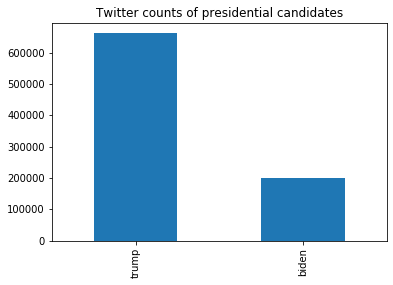

In [41]:
presidential_candidates = ['trump', 'biden']
tweets_by_pres_candidates = [[election['trump'].value_counts()[1],election['biden'].value_counts()[1]]]
print(tweets_by_pres_candidates)

# Plotting the candidate counts
candidate_frame = pd.DataFrame(tweets_by_pres_candidates,columns=presidential_candidates)
candidate_frame.T.plot(kind='bar',legend=False,title="Twitter counts of presidential candidates")

##### Finding top 5 users with highest followers_count

In [31]:
top_5 = election.sort_values(by='followers_count',ascending=False).drop_duplicates('username')
top_5.head()

,id,username,tweet,followers_count,location,trump,biden
351923,1314024448756981764,CNN Breaking News,the trump administration has asked the supreme...,58860025.0,Everywhere,True,False
5335,1314016295092879360,CNN,moderator susan page began the vpdebate by be...,50000171.0,None,False,False
104011,1314020497357766658,The New York Times,kamala harris made a misleading claim about th...,47444326.0,New York City,True,False
149930,1314024084070690816,BBC News World,rt bbcnorthamerica kamala harris says trump ...,29191236.0,"London, UK",True,False
620531,1314005324207194119,The Economist,rt econus the vice presidential debate betwe...,25050100.0,London,False,False


The top 5 users by following count are CNN Breaking News, CNN, The New York Times, BBC News World and the Economist
All report overwhelmingly on Trump compared to Biden

##### Bar/Pie Graph of number of tweets by each of the top 5 media channels on trump and Biden

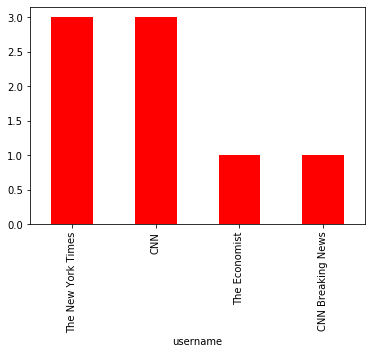

In [43]:
#Trump Tweets
election[(election['trump']==True) &((election['username']=='CNN Breaking News') |(election['username']=='CNN')|(election['username']=='The Economist')
| (election['username']=='The New York Times')|(election['username']=='BBC News World'))].groupby('username')['tweet'].count().sort_values(ascending=False).plot(kind='bar',color='r')

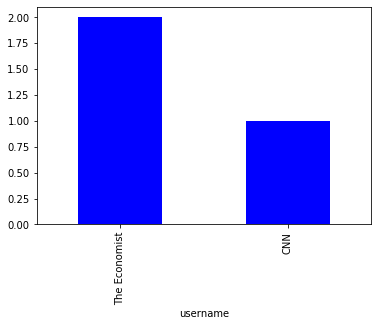

In [44]:
#Trump Tweets
election[(election['biden']==True) &((election['username']=='CNN Breaking News') |(election['username']=='CNN')|(election['username']=='The Economist')
| (election['username']=='The New York Times')|(election['username']=='BBC News World'))].groupby('username')['tweet'].count().sort_values(ascending=False).plot(kind='bar',color='blue')

### 4. Sentiment Analysis

#### Python TextBlob Sentiment Analysis

Sentiment Analysis refers to the process of taking natural language to identify and extract subjective information. You can enter text, run it through the TextBlob and the program will return if the text is positive, neutral, or negative by analyzing the language used in the text.

Here, we analyze the polarity, subjectivity and Classification of every tweet.

Polarity - a measure of the negativity, the neutralness, or the positivity of the text

Subjectivity - a measure of the subjectiveness of the object. The more it is, the more subjective is the information.

Classification - either pos or neg indicating if the text is positive or negative To calculate the overall sentiment, we look at the polarity score:

In [ ]:
# Importing TextBlob from textblob to find polarity
from textblob import TextBlob

def find_polarity(tweet):
    try:
        textblob_tweet = TextBlob(tweet)
        return textblob_tweet.polarity
    except:
        pass
    
def find_subjectivity(tweet):
    try:
        textblob_tweet = TextBlob(tweet)
        return textblob_tweet.subjectivity
    except:
        pass
    
# Applying textblob to each tweets text
election['polarity'] = election['tweet'].apply(lambda tweet:find_polarity(tweet))
election['subjectivity'] = election['tweet'].apply(lambda tweet:find_subjectivity(tweet))

In [148]:
election.head(2)

,id,username,tweet,followers_count,location,trump,biden,polarity,subjectivity,polaritytext,subjectivitytext
0,1314003645998956550,Andrew McQuinn,senschumer marniefriedma trump supports ar...,84.0,None,True,False,-0.083333,0.083333,neutral,meaningful
1,1314003646280077315,kay,rt glennkesslerwp trump s antibody treatment...,15463.0,Texas,True,False,0.375000,0.750000,happy,subjective


In [147]:
#Tweets subset which contain both trump and biden in tweets
both_candidates = election[(election['trump']==True) & (election['biden']==True)]
both_candidates.head()

,id,username,tweet,followers_count,location,trump,biden,polarity,subjectivity,polaritytext,subjectivitytext
2,1314003646280065024,Alberto Carlos,rt realjameswoods trump would cut taxes by a...,8950.0,CABA,True,True,0.160000,0.54,neutral,subjective
16,1314003649358491648,Bilo Segdiyev,yo joebiden kamalaharris y all should reser...,33.0,None,True,True,0.200000,0.20,neutral,meaningful
22,1314003649706766341,Teri C,rt jim_jordan the obama biden administration...,2.0,None,True,True,0.000000,0.00,neutral,meaningful
90,1314003654396043264,carol skarlat att net,rt trumpwarroom kamala harris doesn t stand ...,79.0,None,True,True,0.000000,0.00,neutral,meaningful
124,1314003658015637505,Gary Bird,rt realdonaldtrump wow now do something a...,9443.0,KY,True,True,0.033333,0.40,neutral,meaningful


#### Analyzing polarity

In [150]:
both_candidates.describe()
# Tweets which contain both candidates are largely neutral with slightly
#positive polarity score (0.03 average)

,followers_count,polarity,subjectivity
count,7.393200e+04,73932.000000,73932.000000
mean,5.128217e+03,0.036845,0.308651
std,8.636597e+04,0.241745,0.318489
min,0.000000e+00,-1.000000,0.000000
25%,1.020000e+02,0.000000,0.000000
50%,5.210000e+02,0.000000,0.270000
75%,2.424250e+03,0.068182,0.500000
max,7.745513e+06,1.000000,1.000000


In [64]:
election.sort_values('polarity',ascending=True).head(10)

,id,username,tweet,followers_count,location,trump,biden,polarity,subjectivity
375101,1314026030508716032,smchatter,maddow joyannreid nicolledwallace lincoln i...,197.0,None,True,False,-1.0,1.0
999127,1313997190969294848,Brian,rt warlikefire contrary to what they want yo...,131.0,"Long Beach, CA",True,True,-1.0,1.0
115900,1314016736048558080,David Oppenheim,rt lolgop when you explain how terrible the ...,110.0,"Chicago, IL",True,False,-1.0,1.0
930090,1313975632271990785,Big Dipshit Rockets Inc,rt thucydiplease trump leveraging his typhoi...,257.0,United States,True,False,-1.0,1.0
599243,1313995568427999232,KatBallo,rt cernovich everything is boring since trum...,1483.0,"Prospect, CT",True,False,-1.0,1.0
267062,1313963979736137730,alexdemonet,rt meidastouch the trump administration is l...,18.0,None,True,False,-1.0,1.0
806648,1313958813863735301,Rod Kimble,rt williamcson saying trump is not america ...,919.0,Just chillin in cedar rapids,True,False,-1.0,1.0
115954,1314016740448317442,Gi,pence amp trump are pathetic,4649.0,None,True,False,-1.0,1.0
970832,1314027544811888640,Marie Head,rt secupp joe biden and i are people of fai...,207.0,"Georgia, USA",False,True,-1.0,1.0
1018649,1314012428213071872,Shelia Glenn,rt calebjhull mike pence already dropping bo...,35.0,None,True,True,-1.0,1.0


In [ ]:
#Top 10 most negative tweets in terms of polarity (-1)

In [66]:
#Trump features in 9 out of 10 most negative tweets
election.sort_values('polarity',ascending=True).head(10)['trump'].sum()

9

In [67]:
#Biden features in 3 out of 10 most negative tweets
election.sort_values('polarity',ascending=True).head(10)['biden'].sum()

3

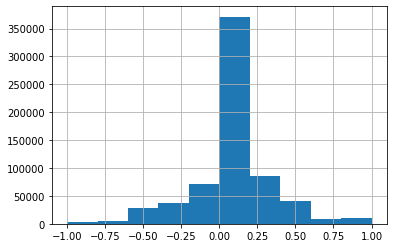

In [70]:
election[election['trump']==True].polarity.hist()

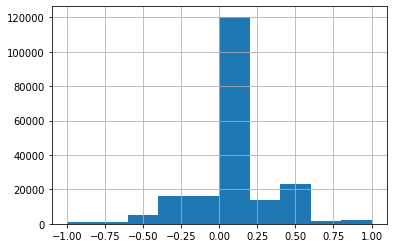

In [71]:
election[election['biden']==True].polarity.hist()

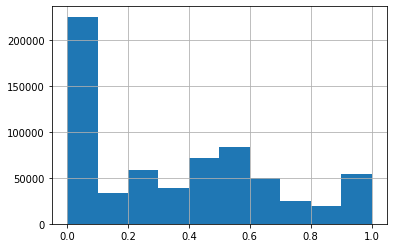

In [72]:
election[election['trump']==True].subjectivity.hist()

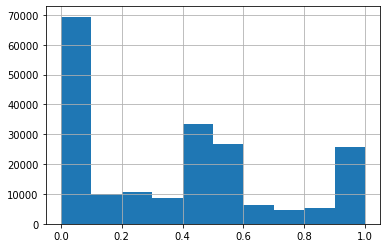

In [73]:
election[election['biden']==True].subjectivity.hist()

In [ ]:
#The histogram shows that the most of the posts come from subjectivity around 0 and polarity 0,
#most of them are the news. Which tweets do not have any emotional meaning.

In [74]:
# Determining if they a comment is satisfied or not satisfied (split by range)
election['polaritytext'] =  pd.cut(election.polarity, 3,labels=["unhappy","neutral","happy"])
election['subjectivitytext'] =  pd.cut(election.subjectivity, 2,labels=["meaningful","subjective"])

### Saving final dataframe for further analysis

In [105]:
election.to_csv('election_final.csv')

#### Read in final dataset 

In [3]:
election = pd.read_csv('election_final.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
election.head()

,Unnamed: 0,id,username,tweet,followers_count,location,trump,biden,polarity,subjectivity,polaritytext,subjectivitytext
0,0,1.314e+18,Andrew McQuinn,senschumer marniefriedma trump supports ar...,84.0,None,True,False,-0.083333,0.083333,neutral,meaningful
1,1,1.314e+18,kay,rt glennkesslerwp trump s antibody treatment...,15463.0,Texas,True,False,0.375000,0.750000,happy,subjective
2,2,1.314e+18,Alberto Carlos,rt realjameswoods trump would cut taxes by a...,8950.0,CABA,True,True,0.160000,0.540000,neutral,subjective
3,3,1.314e+18,sallie sanders,rt sherdngr take it from a cattleman that d...,318.0,"baton rouge, la",True,False,0.000000,0.000000,neutral,meaningful
4,4,1.314e+18,Gal from Cal,rt paulsperry_ breaking joe biden is the su...,1855.0,California,False,True,-0.233333,0.494444,neutral,meaningful


In [4]:
# Separating biden and Trump Tweets
tweets_biden = election[election['biden']==True]
tweets_trump = election[election['trump'] == True]

In [151]:
tweets_trump.describe()
#tweets on trump have a low average polarity of 0.05 
#(which means on an average, the overall sentiment is slightly positive)

,followers_count,polarity,subjectivity
count,6.611100e+05,661110.000000,661110.000000
mean,5.952529e+03,0.054976,0.346460
std,2.117319e+05,0.270229,0.317652
min,0.000000e+00,-1.000000,0.000000
25%,9.700000e+01,0.000000,0.000000
50%,4.360000e+02,0.000000,0.333333
75%,1.949000e+03,0.190476,0.550595
max,5.886002e+07,1.000000,1.000000


In [115]:
tweets_trump.shape

(661110, 11)

In [143]:
#Analzing top 10 users with maximum follower count and tweeting very 
#favourably for trump (polarity of 1)
tweets_trump[tweets_trump['polarity']==tweets_trump['polarity'].max()].\
sort_values(by='followers_count',ascending=False).head(10)

,id,username,tweet,followers_count,location,trump,biden,polarity,subjectivity,polaritytext,subjectivitytext
816329,1313975212535316480,Judd Legum,of the four people participating in this year ...,442750.0,"Washington, DC",True,True,1.0,0.3,happy,meaningful
418099,1313999476122628097,Steph,rt jackposobiec trump is using the powers of...,315968.0,None,True,False,1.0,0.3,happy,meaningful
642056,1314000802818732034,Daily Kos,trump s batting a perfect zero on his claims o...,292461.0,None,True,False,1.0,1.0,happy,subjective
180676,1314022930716733443,Mark Lutchman,what trump said about john mccain was awesome,291552.0,"Philadelphia, PA",True,False,1.0,1.0,happy,subjective
824613,1313975274791297026,BRIAN FRASER,rt jackposobiec trump is using the powers of...,257416.0,Pacific Northwest BC 🇨🇦🇺🇸,True,False,1.0,0.3,happy,meaningful
408711,1314009357789528065,Janie Johnson Champion Of Lemonade Stands,rt latamfortrump latam for trump pays tribut...,202594.0,"Nevada, USA",True,False,1.0,0.3,happy,meaningful
938386,1313991850961915904,John Kiss My Bot,saysmissy trump is the best president ever,199681.0,Where Freedom Rings,True,False,1.0,0.3,happy,meaningful
923180,1314010801959821313,Karen Attiah,harris s face while pence talks about trump s ...,195281.0,None,True,False,1.0,1.0,happy,subjective
1024163,1314011191350571009,David Rothkopf,rt brooks_rosa pence trump led greatest mob...,192607.0,"Washington, DC & New York City",True,False,1.0,1.0,happy,subjective
45427,1314021374738923520,Khashoggi s Ghost,rt djrothkopf trump will be very proud of pe...,177943.0,Beautiful Northern California,True,False,1.0,1.0,happy,subjective


In [156]:
#Analzing top 10 users with maximum follower count and tweeting very 
#negatively for trump (polarity of -1)
tweets_trump[tweets_trump['polarity']==tweets_trump['polarity'].min()].\
sort_values(by='followers_count',ascending=False).head(10)

,id,username,tweet,followers_count,location,trump,biden,polarity,subjectivity,polaritytext,subjectivitytext
507302,1313981181487128576,Daily Caller,rebounding from a terrible mistake pelosi w...,760808.0,"Washington, DC",True,False,-1.0,1.0,unhappy,subjective
476131,1313989109359153152,Cernovich,everything is boring since trump got the rona,725700.0,"Orange County, California",True,False,-1.0,1.0,unhappy,subjective
931688,1313984474754019330,Sherrod Brown,rt senatebanking racial disparities acceler...,454606.0,"Cleveland, OH",True,False,-1.0,1.0,unhappy,subjective
558409,1313961069124165632,NEWS Denver,republicans see grim senate map and edge awa...,448765.0,"Denver, Colorado",True,False,-1.0,1.0,unhappy,subjective
931712,1313984477983580160,Alive News,republicans see grim senate map and edge awa...,398513.0,Atlanta,True,False,-1.0,1.0,unhappy,subjective
368181,1314012902433619969,Mercury News,with the map looking grim republicans edge ...,251946.0,"Silicon Valley, CA",True,False,-1.0,1.0,unhappy,subjective
469001,1314015729293897728,Tony Posnanski,pence is doing horribly he is trying to jab l...,222887.0,None,True,False,-1.0,1.0,unhappy,subjective
8461,1313963325680648192,WWL TV,republicans see grim senate map and edge awa...,204846.0,None,True,False,-1.0,1.0,unhappy,subjective
251137,1313985497748959233,News Quotes,trump hit with wave of grim poll results for b...,148234.0,Worldwide,True,False,-1.0,1.0,unhappy,subjective
705656,1314013497924165636,Emma Vigeland,it is hysterical that trump and pence keep try...,137359.0,"New York, NY",True,True,-1.0,1.0,unhappy,subjective


In [120]:
#Proportion of Positive tweets for Trump
sum(tweets_trump['polarity']>0)/len(tweets_trump)*100

39.057040432000726

In [121]:
tweets_biden.shape

(200708, 11)

In [152]:
tweets_biden.describe()
#Biden has slightly higher scores on polarity on average than trump (0.07)

,followers_count,polarity,subjectivity
count,2.007080e+05,200708.000000,200708.000000
mean,5.204412e+03,0.074043,0.364012
std,1.527508e+05,0.270646,0.338946
min,0.000000e+00,-1.000000,0.000000
25%,1.060000e+02,0.000000,0.000000
50%,4.780000e+02,0.000000,0.400000
75%,2.157000e+03,0.161905,0.575000
max,4.999848e+07,1.000000,1.000000


In [144]:
#Exploring top 10 users with maximum follower count and tweeting very 
#favourably for biden (polarity of 1)
tweets_biden[tweets_biden['polarity']==tweets_biden['polarity'].max()].\
sort_values(by='followers_count',ascending=False).head(10)

,id,username,tweet,followers_count,location,trump,biden,polarity,subjectivity,polaritytext,subjectivitytext
816329,1313975212535316480,Judd Legum,of the four people participating in this year ...,442750.0,"Washington, DC",True,True,1.0,0.3,happy,meaningful
704178,1314014278580531200,WeThePeople,rt kwikwarren pete is arguably the best surr...,83581.0,None,False,True,1.0,0.3,happy,meaningful
360017,1314010105847918599,Movement for a People s Party,joe biden is the best person to save america...,76061.0,United States,False,True,1.0,0.3,happy,meaningful
292326,1313990270099296257,Susan Cooper,rt juddlegum of the four people participatin...,58747.0,North Carolina,True,True,1.0,0.3,happy,meaningful
1003341,1313988488040083456,Mitch Gerads,taylorswift kamalaharris and cookies ...,57806.0,"Phoenix, AZ",False,True,1.0,0.3,happy,meaningful
298046,1313985564694245376,Monica Cates,rt deltanila the_resistor realdonaldtrump ...,56984.0,None,True,True,1.0,0.3,happy,meaningful
811508,1314010638218342401,Laffy,rt klasfeldreports asked how a biden adminis...,56451.0,California,True,True,1.0,1.0,happy,subjective
224036,1314009065685745664,Kenny BooYah,pete is arguably the best surrogate out there ...,47118.0,Texan Living In Florida,False,True,1.0,0.3,happy,meaningful
14219,1313979704458665984,Dumb Beezie,rt juddlegum of the four people participatin...,46890.0,Offline,True,True,1.0,0.3,happy,meaningful
789217,1313969488367439874,Michael O Grady,rt mog biden s gettysburg address the b...,46756.0,CANADA,False,True,1.0,0.3,happy,meaningful


In [123]:
#Ratio of Positive tweets for Biden
sum(tweets_biden['polarity']>0)/len(tweets_biden)*100

42.05163720429679

In [ ]:
# Thus, the proportion of positive tweets on biden is 42% while that of trump
# is 39%

#### Comparative Analysis on Polarity

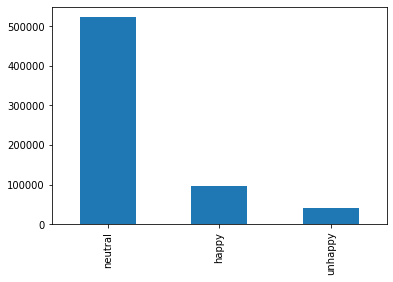

In [77]:
tweets_trump['polaritytext'].value_counts().plot(kind='bar')

In [96]:
trump_polarity_abs = tweets_trump['polaritytext'].value_counts().rename('trump')
trump_polarity_abs 

neutral    523161
happy       96114
unhappy     41835
Name: trump, dtype: int64

In [97]:
trump_polarity_nor = tweets_trump['polaritytext'].value_counts(normalize=True).rename('trump')
trump_polarity_nor

neutral    0.791337
happy      0.145383
unhappy    0.063280
Name: trump, dtype: float64

In [ ]:
#Interestingly the vast majority of tweets on trump are classified as neutral
# Also, tweets classified as happy is 14% , more than the unhappy ones

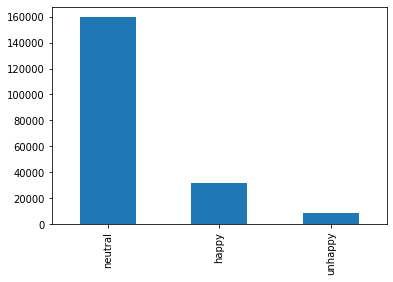

In [79]:
tweets_biden['polaritytext'].value_counts().plot(kind='bar')

In [99]:
biden_polarity_abs = tweets_biden['polaritytext'].value_counts().rename('biden')
biden_polarity_abs 

neutral    159656
happy       32099
unhappy      8953
Name: biden, dtype: int64

In [98]:
biden_polarity_nor = tweets_biden['polaritytext'].value_counts(normalize=True).rename('biden')
biden_polarity_nor

neutral    0.795464
happy      0.159929
unhappy    0.044607
Name: biden, dtype: float64

In [ ]:
# For biden, the number of unhappy tweets is only about 5% of the total tweets
# The number of happy tweets as a proportion of total biden tweets is 16%,
#only marginally higher than that of trump

In [113]:
Comparative_polarity_df = pd.concat([trump_polarity_abs,biden_polarity_abs,
          trump_polarity_nor, biden_polarity_nor],axis=1)
Comparative_polarity_df 

,trump,biden,trump,biden
neutral,523161,159656,0.791337,0.795464
happy,96114,32099,0.145383,0.159929
unhappy,41835,8953,0.063280,0.044607


In [ ]:
# We infer that the ratio of happy tweets on biden slightly outnumber
# those on trump. However, going by sheer numbers, the number of happy tweets on 
#trump far outweigh those on biden. 

Polarity by Location

In [11]:
pol_loc = tweets_trump.groupby(['location'])['polarity'].mean().sort_values()
pd.DataFrame(pol_loc)

,polarity
location,
the demon realm,-1.0
Volcano,-1.0
"Dallas, TX - Southeast Asia",-1.0
Somewhere deepconditioning💆🏾,-1.0
East Aleppo,-1.0
...,...
"REALITY, EARTH",1.0
😺😸😹😻😼😽🙀😿😾,1.0
San Monique,1.0


In [ ]:
# It is difficult to interpret polarity by location as the location column has 
# lot of randon inputs

### Comparative Analysis on Subjectivity

In [106]:
trump_subjectivity_abs = tweets_trump['subjectivitytext'].value_counts().rename('trump')
trump_subjectivity_abs 

meaningful    462893
subjective    198217
Name: trump, dtype: int64

In [107]:
trump_subjectivity_nor = tweets_trump['subjectivitytext'].value_counts(normalize=True).rename('trump')
trump_subjectivity_nor

meaningful    0.700175
subjective    0.299825
Name: trump, dtype: float64

In [ ]:
# The ratio of subjective tweets is around 30%. 

In [108]:
biden_subjectivty_abs = tweets_biden['subjectivitytext'].value_counts().rename('biden')
biden_subjectivty_abs

meaningful    142477
subjective     58231
Name: biden, dtype: int64

In [109]:
biden_subjectivity_nor = tweets_biden['subjectivitytext'].value_counts(normalize=True).rename('biden')
biden_subjectivity_nor

meaningful    0.709872
subjective    0.290128
Name: biden, dtype: float64

In [ ]:
#The proportion of subjective tweets on biden is approx 30%

In [ ]:
#We do not find much difference in the subjectivity values between the 
# 2 candidates

### Findings

- The Number of tweets on trump greatly outnumber those on Biden with a ratio of 4:1
- About 75% of the total 1 million plus tweets are retweets and the unique tweets account for only 25%
- The top 5 users by following count are media outlets such as CNN Breaking News, CNN, The New York Times, BBC News World and the Economist (in that order).All report overwhelmingly on Trump compared to Biden 
- Proportion of positive tweets on trump is 39% while those on Biden are 42%
- However, the number of tweets on Trump is significantly greater over a given timeframe. That is due to the fact that he is the current president and receives lot of media attention.
- The majority of tweets on both candidates fall in the 'Neutral' category

#### Conclusion
- By conducting an exhaustive exploratory analysis, it is inferred that the overall sentiment on Biden is slightly more positive compared to Trump as of October 7th 2020.
- Tweet Analysis is an interesting exercise in determining the sentiment on a topic.

### Challenges / Next Steps

- The tweet data was collected for a short period over a single day period. While the benefit of using AWS Kinesis for webscraping is that is it extremely fast and stores all the tweets on the cloud, the drawback is the cost of using the AWS services.Instead, collecting tweets
over a duration of time would reflect a better picture

- The mention of trump along with another person of interest might distort the polarity. In such cases, it is difficult to decifer, whether a positive/negative comment is for trump or the person of interest.
- Fake news is a major issue and could distort the results

Next Steps

- Tweets would be collected over an extended period to determine more accurate sentiment
- Sentiment Analysis across time

### End